In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def JudgeWord(flag):
    if flag == "a":
        return "形容词"
    elif flag == "ad":
        return "副形词"
    elif flag == "an":
        return "名形词"
    elif flag == "b":
        return "区别词"
    elif flag == "c":
        return "连词"
    elif flag == "dg":
        return "副语素"
    elif flag == "d":
        return "副词"
    elif flag == "e":
        return "叹词"
    elif flag == "f":
        return "方位词"
    elif flag == "g":
        return "语素"
    elif flag == "h":
        return "前接成分"
    elif flag == "i":
        return "成语"
    elif flag == "j":
        return "简称略语"
    elif flag == "k":
        return "后接成分"
    elif flag == "l":
        return "习用语"
    elif flag == "m":
        return "数词"
    elif flag == "Ng":
        return "名语素"
    elif flag == "n":
        return "名词"
    elif flag == "nr":
        return "人名"
    elif flag == "ns":
        return "地名"
    elif flag == "nt":
        return "机构团体"
    elif flag == "nz":
        return "其他专名"
    elif flag == "o":
        return "拟声词"
    elif flag == "p":
        return "介词"
    elif flag == "q":
        return "量词"
    elif flag == "r":
        return "代词"
    elif flag == "s":
        return "处所词"
    elif flag == "tg":
        return "时语素"
    elif flag == "t":
        return "时间词"
    elif flag == "u":
        return "助词"
    elif flag == "vg":
        return "动语素"
    elif flag == "v":
        return "动词"
    elif flag == "vd":
        return "副动词"
    elif flag == "vn":
        return "名动词"
    elif flag == "w":
        return "标点符号"
    elif flag == "x":
        return "非语素字"
    elif flag == "y":
        return "语气词"
    elif flag == "z":
        return "状态词"
    elif flag == "un":
        return "未知词"
    else:
        return 'None'

def remove_stopwords(text):
    with open('stopwords/cn_stopwords.txt', 'r', encoding='utf-8') as f: 
        for i in f:
            text = text.replace(i.strip(), '')
    return text

In [2]:
df = pd.read_csv('comment_con 全部.csv')

text = []
for i in df['content']:
    text.append(remove_stopwords(i.replace('\n', '').replace('*', '').replace(' ','').replace('.','')))

import jieba.analyse as analyse
import jieba.posseg as peg
from collections import Counter

words = []
word_counter = Counter()
flag_counter = Counter()
noun_counter = Counter()
for i in text:
    word = []
    for w, f in peg.cut(i):
        word_counter[w] += 1
        flag_counter[JudgeWord(f)] += 1
        word.append(w)
        if f == 'n':
            noun_counter[w] += 1
    words.append(word)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hejin\AppData\Local\Temp\jieba.cache
Loading model cost 0.494 seconds.
Prefix dict has been built successfully.


In [3]:
flag = []
flag_count = []
for k,v in dict(flag_counter).items():
    flag.append(k)
    flag_count.append(v)
flag_df = pd.DataFrame(np.column_stack([flag, flag_count]), columns = ['词性','数量'])
flag_df = flag_df[flag_df['词性'] != 'None']
flag_df['数量'] = flag_df['数量'].astype(int)
flag_df = flag_df.sort_values(by='数量', ascending=False)
flag_df

,词性,数量
4,名词,10593
0,动词,8612
12,形容词,2343
3,副词,1972
5,人名,1149
11,名动词,863
9,数词,692
7,量词,472
1,地名,412
6,时间词,285


## 词频

In [4]:
word = []
word_count = []
for k,v in dict(word_counter).items():
    word.append(k)
    word_count.append(v)
word_df = pd.DataFrame(np.column_stack([word, word_count]), columns = ['词','数量'])
word_df['数量'] = word_df['数量'].astype(int)
word_df = word_df.sort_values(by='数量', ascending=False)
word_df.reset_index(drop=True, inplace=True)
top_20 = word_df[:20]
top_20

,词,数量
0,安装,1294
1,非常,874
2,师傅,696
3,快,578
4,空调,558
5,效果,446
6,满意,433
7,服务,390
8,送货,386
9,错,357


## 共现

In [5]:
# 共词矩阵
top_20_words = top_20['词']
coemerge = pd.DataFrame(top_20_words)
for col in range(20):
    coli = []
    for row in range(20):
        count = 0
        for sentence in words:
            if top_20_words[row] in sentence and top_20_words[col] in sentence and row != col:
                count += 1
        coli.append(count)
    coemerge[f'col_{col}'] = coli
coemerge.set_index(coemerge.columns[0], inplace=True)
coemerge.columns = top_20_words
coemerge

词,安装,非常,师傅,快,空调,效果,满意,服务,送货,错,买,外观,质量,制冷,物流,没,喜欢,速度,美,品牌
词,,,,,,,,,,,,,,,,,,,,
安装,0,317,505,310,287,214,201,232,262,182,178,190,142,147,151,141,108,138,112,106
非常,317,0,245,228,118,133,213,172,166,155,125,156,143,90,138,89,125,108,59,105
师傅,505,245,0,227,211,146,161,154,194,132,115,137,120,96,122,92,89,106,78,78
快,310,228,227,0,126,131,153,151,172,133,102,147,111,112,160,78,104,155,62,83
空调,287,118,211,126,0,125,51,64,87,70,85,77,53,130,39,68,13,48,110,38
效果,214,133,146,131,125,0,71,71,106,107,56,145,40,172,54,55,38,55,49,45
满意,201,213,161,153,51,71,0,124,103,114,89,104,112,32,102,56,103,74,30,79
服务,232,172,154,151,64,71,124,0,108,94,82,86,92,39,89,58,86,69,30,60
送货,262,166,194,172,87,106,103,108,0,96,71,121,75,58,75,69,65,74,43,61


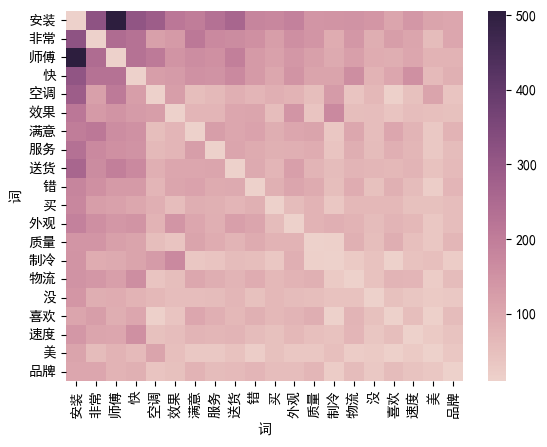

In [6]:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

sns.heatmap(coemerge,vmin=10,vmax=505,cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [7]:
noun = []
noun_count = []
for k,v in dict(noun_counter).items():
    noun.append(k)
    noun_count.append(v)
noun_df = pd.DataFrame(np.column_stack([noun, noun_count]), columns = ['名词','数量'])
noun_df['数量'] = noun_df['数量'].astype(int)
noun_df = noun_df.sort_values(by='数量', ascending=False)
noun_df

,名词,数量
3,空调,558
12,效果,446
29,外观,323
64,质量,283
76,物流,261
...,...,...
771,午货,1
772,前省,1
776,感妈,1
785,姐省,1


## 词云

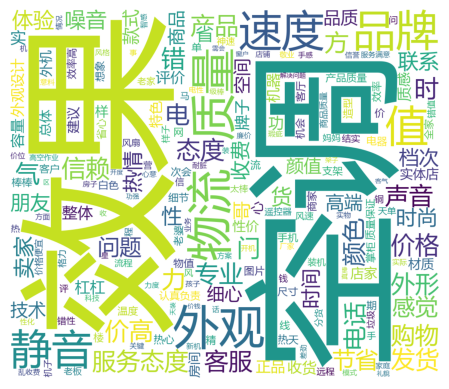

In [8]:
from wordcloud import WordCloud

nouns = ' '.join(noun_df['名词'])
wc = WordCloud(background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2).generate(nouns)
plt.imshow(wc)
plt.axis('off')
plt.show()

## 情感

In [9]:
from snownlp import SnowNLP

sentimental = pd.DataFrame(text, columns = ['评论'])
scores = []
for i in text:
    score = SnowNLP(i).sentiments
    scores.append(score)
sentimental['情感分数'] = scores
sentimental['情感分数'] = sentimental['情感分数'].apply(lambda x:round(x,2))
sentimental

,评论,情感分数
0,相信美营东西隔天立刻意想单美电话说明天快递隔天帮安装期快递天安装想美空调安装部门安排天立刻安...,0.00
1,家里买三台美壁挂机款外形性价错级耗带清洁接美居更智更方便会支持美产品,1.00
2,空调外观简洁气厚实制冷效果静音效果优秀运行时基听声音送货快安装师傅技术态度非常非常棒,1.00
3,活动买价格全网低性价特棒买声音特特喜欢旧换新活动力快递快错真喜欢力力,0.97
4,商品错快递安装员改善,0.11
...,...,...
1194,太换新时间长安装加加架旧机白运,0.27
1195,般般没装,0.11
1196,块暂时接受,0.33
1197,空调安装坑说免费安装实部分收费孔费高空作业费支架费外收两三百费年买格力安装费什包额外收费问清楚行,0.00


In [10]:
sentimental[sentimental['情感分数']>0]

,评论,情感分数
1,家里买三台美壁挂机款外形性价错级耗带清洁接美居更智更方便会支持美产品,1.00
2,空调外观简洁气厚实制冷效果静音效果优秀运行时基听声音送货快安装师傅技术态度非常非常棒,1.00
3,活动买价格全网低性价特棒买声音特特喜欢旧换新活动力快递快错真喜欢力力,0.97
4,商品错快递安装员改善,0.11
5,天单二天立马售电话预约安装时间快速方便特师傅专业钻水孔沒收费加两米铜特满意机子图片样白色简洁...,0.05
...,...,...
1193,安装师傅美配件收费太高加米元送货速度挺快,0.51
1194,太换新时间长安装加加架旧机白运,0.27
1195,般般没装,0.11
1196,块暂时接受,0.33


In [11]:
pos_words = Counter()
neg_words = Counter()

for i in sentimental['评论']:
    for w, f in peg.cut(i):
        s = SnowNLP(w)
        if s.sentiments > 0.5:
            pos_words[w] += 1
        else:
            neg_words[w] += 1

In [15]:
pos = []
pos_count = []
for k,v in dict(pos_words).items():
    pos.append(k)
    pos_count.append(v)
pos_df = pd.DataFrame(np.column_stack([pos, pos_count]), columns = ['正情感','数量'])
pos_df['数量'] = pos_df['数量'].astype(int)
pos_df = pos_df.sort_values(by='数量', ascending=False)
pos_df

,正情感,数量
61,非常,874
28,快,578
20,效果,446
74,满意,433
91,服务,390
...,...,...
955,赖希,1
956,赞评,1
959,款件,1
962,心贴心,1


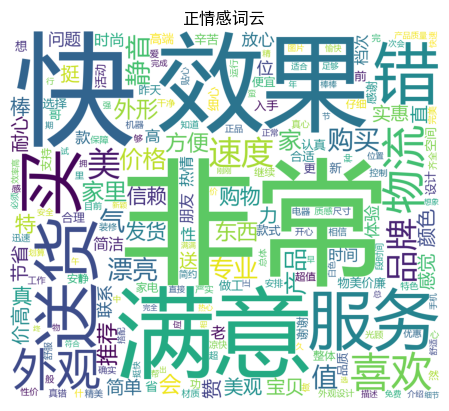

In [20]:
positive = ' '.join(pos_df['正情感'])
wc = WordCloud(background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2).generate(positive)
plt.imshow(wc)
plt.axis('off')
plt.title('正情感词云')
plt.show()

In [18]:
neg = []
neg_count = []
for k,v in dict(neg_words).items():
    neg.append(k)
    neg_count.append(v)
neg_df = pd.DataFrame(np.column_stack([neg, neg_count]), columns = ['负情感','数量'])
neg_df['数量'] = neg_df['数量'].astype(int)
neg_df = neg_df.sort_values(by='数量', ascending=False)
neg_df

,负情感,数量
5,安装,1294
9,师傅,696
7,空调,558
82,质量,283
18,制冷,265
...,...,...
1270,受住,1
1269,忍,1
1268,字幕,1
450,超时,1


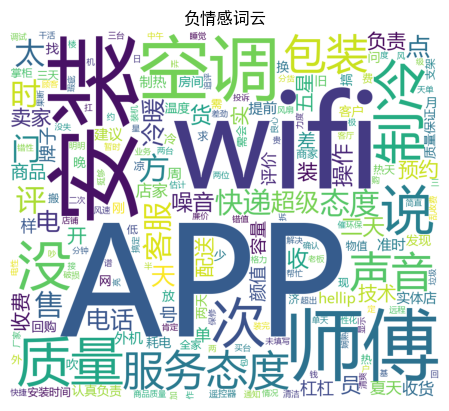

In [21]:
negative = ' '.join(neg_df['负情感'])
wc = WordCloud(background_color='white',font_path = 'msyh.ttc', width=1000, height=860, margin=2).generate(negative)
plt.imshow(wc)
plt.axis('off')
plt.title('负情感词云')
plt.show()